# PreProcessing Berita UAS

In [29]:
!pip install Sastrawi

In [30]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

import warnings
import pandas as pd
import numpy as np
import nltk
import re
import csv

nltk.download('stopwords')
nltk.download('punkt')
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [31]:
df = pd.read_csv('/content/drive/MyDrive/projectPPW/tugas/CrawlingBerita (2).csv')
df

,Judul,Content,Category
0,Bupati Galang Bantuan Palestina Terkumpul Rp 5 M,SIDOARJO (RadarJatim.id) — Bupati Sidoarjo Ah...,Religi
1,"Spirit Hari Pahlawan, Nurul Hayat Gelar Silatu...",GRESIK (RadarJatim.id) — Momentum Hari Pahlawa...,Religi
2,Implementasikan P5 Siswa SMA YPM 2 Sukodono Ob...,SIDOARJO (RadarJatim.id.) — Siswa dan siswi ke...,Pendidikan
3,MI Ma’arif Pagerwojo Shalat Ghaib untuk Rakyat...,SIDOARJO (RadarJatim.id) — MI Ma’arif Pagerwoj...,Pendidikan
4,MI Al Abror Kauman Shalat Ghoib dan Doa Bersam...,SIDOARJO (RadarJatim.id) — Shalat Ghoib dan do...,Pendidikan
...,...,...,...
745,Ribuan PAUD se Kecamatan Gedangan Pawai HAN k...,SIDOARJO (RadarJatim.id) — Sekitar 1.500 peser...,Pendidikan
746,KKN-T 29 Umsida Tanamkan Nilai Agama dan Akhla...,SIDOARJO (RadarJatim.id) — Bertujuan untuk mem...,Pendidikan
747,Lulusan SLTA Barunawati Banyak Diterima di PTN,SURABAYA (RadarJatim.id) — Yayasan Barunawati ...,Pendidikan
748,Mahasiswa KKN Unusa Ajarkan Budi Daya Maggot,GRESIK (RadarJatim.id) – Saat ini budi daya ma...,Pendidikan


Jumlah Raw Data Awal

In [32]:
# Hitung jumlah kelas
kelas = df['Category'].value_counts()
kelas

Pendidikan    390
Religi        186
Sosial        174
Name: Category, dtype: int64

Cek Missing Value

In [33]:
df.isna().sum()

Judul       0
Content     2
Category    0
dtype: int64

Menghapus Missing Value

In [34]:
df = df.dropna()
df

,Judul,Content,Category
0,Bupati Galang Bantuan Palestina Terkumpul Rp 5 M,SIDOARJO (RadarJatim.id) — Bupati Sidoarjo Ah...,Religi
1,"Spirit Hari Pahlawan, Nurul Hayat Gelar Silatu...",GRESIK (RadarJatim.id) — Momentum Hari Pahlawa...,Religi
2,Implementasikan P5 Siswa SMA YPM 2 Sukodono Ob...,SIDOARJO (RadarJatim.id.) — Siswa dan siswi ke...,Pendidikan
3,MI Ma’arif Pagerwojo Shalat Ghaib untuk Rakyat...,SIDOARJO (RadarJatim.id) — MI Ma’arif Pagerwoj...,Pendidikan
4,MI Al Abror Kauman Shalat Ghoib dan Doa Bersam...,SIDOARJO (RadarJatim.id) — Shalat Ghoib dan do...,Pendidikan
...,...,...,...
745,Ribuan PAUD se Kecamatan Gedangan Pawai HAN k...,SIDOARJO (RadarJatim.id) — Sekitar 1.500 peser...,Pendidikan
746,KKN-T 29 Umsida Tanamkan Nilai Agama dan Akhla...,SIDOARJO (RadarJatim.id) — Bertujuan untuk mem...,Pendidikan
747,Lulusan SLTA Barunawati Banyak Diterima di PTN,SURABAYA (RadarJatim.id) — Yayasan Barunawati ...,Pendidikan
748,Mahasiswa KKN Unusa Ajarkan Budi Daya Maggot,GRESIK (RadarJatim.id) – Saat ini budi daya ma...,Pendidikan


Menghitung data duplikat

In [36]:
df.duplicated().sum()

54

Hapus data duplikat

In [37]:
df = df.drop_duplicates()
df

,Judul,Content,Category
0,Bupati Galang Bantuan Palestina Terkumpul Rp 5 M,SIDOARJO (RadarJatim.id) — Bupati Sidoarjo Ah...,Religi
1,"Spirit Hari Pahlawan, Nurul Hayat Gelar Silatu...",GRESIK (RadarJatim.id) — Momentum Hari Pahlawa...,Religi
2,Implementasikan P5 Siswa SMA YPM 2 Sukodono Ob...,SIDOARJO (RadarJatim.id.) — Siswa dan siswi ke...,Pendidikan
3,MI Ma’arif Pagerwojo Shalat Ghaib untuk Rakyat...,SIDOARJO (RadarJatim.id) — MI Ma’arif Pagerwoj...,Pendidikan
4,MI Al Abror Kauman Shalat Ghoib dan Doa Bersam...,SIDOARJO (RadarJatim.id) — Shalat Ghoib dan do...,Pendidikan
...,...,...,...
745,Ribuan PAUD se Kecamatan Gedangan Pawai HAN k...,SIDOARJO (RadarJatim.id) — Sekitar 1.500 peser...,Pendidikan
746,KKN-T 29 Umsida Tanamkan Nilai Agama dan Akhla...,SIDOARJO (RadarJatim.id) — Bertujuan untuk mem...,Pendidikan
747,Lulusan SLTA Barunawati Banyak Diterima di PTN,SURABAYA (RadarJatim.id) — Yayasan Barunawati ...,Pendidikan
748,Mahasiswa KKN Unusa Ajarkan Budi Daya Maggot,GRESIK (RadarJatim.id) – Saat ini budi daya ma...,Pendidikan


Jumlah Raw Data Akhir

In [38]:
#Hitung jumlah kelas
kelas = df['Category'].value_counts()
kelas

Pendidikan    350
Sosial        174
Religi        170
Name: Category, dtype: int64

In [39]:
df

,Judul,Content,Category
0,Bupati Galang Bantuan Palestina Terkumpul Rp 5 M,SIDOARJO (RadarJatim.id) — Bupati Sidoarjo Ah...,Religi
1,"Spirit Hari Pahlawan, Nurul Hayat Gelar Silatu...",GRESIK (RadarJatim.id) — Momentum Hari Pahlawa...,Religi
2,Implementasikan P5 Siswa SMA YPM 2 Sukodono Ob...,SIDOARJO (RadarJatim.id.) — Siswa dan siswi ke...,Pendidikan
3,MI Ma’arif Pagerwojo Shalat Ghaib untuk Rakyat...,SIDOARJO (RadarJatim.id) — MI Ma’arif Pagerwoj...,Pendidikan
4,MI Al Abror Kauman Shalat Ghoib dan Doa Bersam...,SIDOARJO (RadarJatim.id) — Shalat Ghoib dan do...,Pendidikan
...,...,...,...
745,Ribuan PAUD se Kecamatan Gedangan Pawai HAN k...,SIDOARJO (RadarJatim.id) — Sekitar 1.500 peser...,Pendidikan
746,KKN-T 29 Umsida Tanamkan Nilai Agama dan Akhla...,SIDOARJO (RadarJatim.id) — Bertujuan untuk mem...,Pendidikan
747,Lulusan SLTA Barunawati Banyak Diterima di PTN,SURABAYA (RadarJatim.id) — Yayasan Barunawati ...,Pendidikan
748,Mahasiswa KKN Unusa Ajarkan Budi Daya Maggot,GRESIK (RadarJatim.id) – Saat ini budi daya ma...,Pendidikan


Cleaning data

In [40]:
def cleaning(text):
  text = re.sub(r'[^a-zA-Z\s]', '', text).strip()
  return text

df['data_clean'] = df['Category'].apply(cleaning)
df['data_clean']

0          Religi
1          Religi
2      Pendidikan
3      Pendidikan
4      Pendidikan
          ...    
745    Pendidikan
746    Pendidikan
747    Pendidikan
748    Pendidikan
749    Pendidikan
Name: data_clean, Length: 694, dtype: object

Tokenizing

In [41]:
def tokenizer(text):
  text = text.lower()
  return word_tokenize(text)

df['Tokenizing'] = df['data_clean'].apply(tokenizer)
df['Tokenizing']

0          [religi]
1          [religi]
2      [pendidikan]
3      [pendidikan]
4      [pendidikan]
           ...     
745    [pendidikan]
746    [pendidikan]
747    [pendidikan]
748    [pendidikan]
749    [pendidikan]
Name: Tokenizing, Length: 694, dtype: object

Stopword

In [42]:
#custome stopword

from nltk.corpus import stopwords

# Mengambil daftar stopword bahasa Indonesia dari NLTK
stopwords_indonesia = set(stopwords.words("indonesian"))

# Sekarang, Anda memiliki daftar stopword yang telah diperbarui
print(stopwords_indonesia)

{'inginkan', 'bilakah', 'dimulainya', 'meyakinkan', 'termasuk', 'sempat', 'jadi', 'diucapkannya', 'tahun', 'ditanyai', 'seketika', 'katakanlah', 'selanjutnya', 'dilakukan', 'pukul', 'seolah', 'demikianlah', 'berturut', 'sebegitu', 'sesudahnya', 'tidak', 'disampaikan', 'sebaiknya', 'sejumlah', 'beberapa', 'olehnya', 'gunakan', 'pernah', 'setelah', 'bersama', 'adapun', 'masalahnya', 'berlalu', 'jumlahnya', 'nah', 'seperlunya', 'bagaimanakah', 'akhir', 'awal', 'merupakan', 'tadinya', 'sebesar', 'mengakhiri', 'se', 'kembali', 'sama-sama', 'sebabnya', 'melihat', 'begitulah', 'adalah', 'menyebutkan', 'terutama', 'bekerja', 'sepantasnya', 'disinilah', 'tadi', 'dikatakannya', 'katanya', 'perlukah', 'kalaupun', 'mempersiapkan', 'sebetulnya', 'kelihatan', 'seterusnya', 'menuju', 'disebutkan', 'kamilah', 'menyampaikan', 'terhadap', 'menginginkan', 'kebetulan', 'setiap', 'tanya', 'seperti', 'siapakah', 'bukannya', 'dijelaskannya', 'menunjukkan', 'menyeluruh', 'waktunya', 'bagi', 'maka', 'sebutnya'

In [43]:
# Tambahkan kata-kata stopword kustom Anda ke dalam set
custom_stopwords = {"bisa-bisanya", "sebisanya", "mungkin", "ini"}

# Gabungkan kedua set stopword
stopwords_indonesia.update(custom_stopwords)

# Sekarang, Anda memiliki daftar stopword yang telah diperbarui
print(stopwords_indonesia)

{'inginkan', 'bilakah', 'dimulainya', 'meyakinkan', 'termasuk', 'sempat', 'jadi', 'diucapkannya', 'tahun', 'ditanyai', 'seketika', 'katakanlah', 'selanjutnya', 'dilakukan', 'pukul', 'seolah', 'demikianlah', 'berturut', 'sebegitu', 'sesudahnya', 'tidak', 'disampaikan', 'sebaiknya', 'sejumlah', 'beberapa', 'olehnya', 'gunakan', 'pernah', 'setelah', 'bersama', 'adapun', 'masalahnya', 'berlalu', 'jumlahnya', 'nah', 'seperlunya', 'bagaimanakah', 'akhir', 'awal', 'merupakan', 'tadinya', 'sebesar', 'mengakhiri', 'se', 'kembali', 'sama-sama', 'sebabnya', 'melihat', 'begitulah', 'adalah', 'menyebutkan', 'terutama', 'bekerja', 'sepantasnya', 'disinilah', 'tadi', 'dikatakannya', 'katanya', 'perlukah', 'kalaupun', 'mempersiapkan', 'sebetulnya', 'kelihatan', 'seterusnya', 'menuju', 'disebutkan', 'kamilah', 'menyampaikan', 'terhadap', 'menginginkan', 'kebetulan', 'setiap', 'tanya', 'seperti', 'siapakah', 'bukannya', 'dijelaskannya', 'menunjukkan', 'menyeluruh', 'waktunya', 'bagi', 'maka', 'sebutnya'

In [44]:
corpus = stopwords.words('indonesian')

def stopwordText(words):
 return [word for word in words if word not in corpus]

df['Stopword Removal'] = df['Tokenizing'].apply(stopwordText)

# Gabungkan kembali token menjadi kalimat utuh
df['stopword'] = df['Stopword Removal'].apply(lambda x: ' '.join(x))
df['stopword']

0          religi
1          religi
2      pendidikan
3      pendidikan
4      pendidikan
          ...    
745    pendidikan
746    pendidikan
747    pendidikan
748    pendidikan
749    pendidikan
Name: stopword, Length: 694, dtype: object

In [45]:
df.reset_index(drop=True, inplace=True)

In [46]:
len(df['Tokenizing'])

694

In [49]:
# Inisialisasi TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [51]:
tfidf_results = []
tfidf_vectorizer = TfidfVectorizer()

for i in range(len(df['Tokenizing'])):
    tfidf_matrix = tfidf_vectorizer.fit_transform(df['Tokenizing'][i])
    tfidf_results.append(tfidf_matrix)

for idoc, tfidf_matrix in enumerate(tfidf_results):
    print(f'================================ Dokumen ke-{idoc} ================================')


    arr_tfidf_results = tfidf_matrix.toarray()

    for index, hasil_tfidf in enumerate(arr_tfidf_results):

        print(f'TF-IDF Kalimat ke-{index + 1}: {list(hasil_tfidf)}')
    print('\n')


================================ Dokumen ke-0 ================================
TF-IDF Kalimat ke-1: [1.0]


================================ Dokumen ke-1 ================================
TF-IDF Kalimat ke-1: [1.0]


================================ Dokumen ke-2 ================================
TF-IDF Kalimat ke-1: [1.0]


================================ Dokumen ke-3 ================================
TF-IDF Kalimat ke-1: [1.0]


================================ Dokumen ke-4 ================================
TF-IDF Kalimat ke-1: [1.0]


================================ Dokumen ke-5 ================================
TF-IDF Kalimat ke-1: [1.0]


================================ Dokumen ke-6 ================================
TF-IDF Kalimat ke-1: [1.0]


================================ Dokumen ke-7 ================================
TF-IDF Kalimat ke-1: [1.0]


================================ Dokumen ke-8 ================================
TF-IDF Kalimat ke-1: [1.0]


============================

In [53]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms.shortest_paths import weighted

In [54]:
cos_sim_result = []
graf_result = []
treshold = 0.08 #inisialisasi treshold

for i_doc in range(len(tfidf_results)):


  cos_sim_now = []
  graf_now = nx.DiGraph()
  cos_sim = cosine_similarity(tfidf_results[i_doc])

  for i_hasil in range(len(cos_sim)):
    arr_cosim = []

    for j_hasil in range(i_hasil+1,len(cos_sim)):
      if cos_sim[i_hasil][j_hasil] > treshold:


        arr_cosim.append([i_hasil,j_hasil,cos_sim[i_hasil][j_hasil]])
        graf_now.add_edge(i_hasil,j_hasil,weight=cos_sim[i_hasil][j_hasil])

    cos_sim_now.append(arr_cosim)
    # graf_now.append(graf_current)
  cos_sim_result.append(cos_sim_now)
  graf_result.append(graf_now)
   #print('\n')

In [55]:
for i, cos_sim_now in enumerate(cos_sim_result):
    print(f'============= Document ke - {i} ==============')

    for j, similar_pairs in enumerate(cos_sim_now):
        for idx1, idx2, hasil in similar_pairs:
            print(f'Cosine Similarity Kalimat {idx1} : {idx2} = {hasil}')

    print('\n')


============= Document ke - 0 ==============


============= Document ke - 1 ==============


============= Document ke - 2 ==============


============= Document ke - 3 ==============


============= Document ke - 4 ==============


============= Document ke - 5 ==============


============= Document ke - 6 ==============


============= Document ke - 7 ==============


============= Document ke - 8 ==============


============= Document ke - 9 ==============


============= Document ke - 10 ==============


============= Document ke - 11 ==============


============= Document ke - 12 ==============


============= Document ke - 13 ==============


============= Document ke - 14 ==============


============= Document ke - 15 ==============


============= Document ke - 16 ==============


============= Document ke - 17 ==============


============= Document ke - 18 ==============


============= Document ke - 19 ==============


============= Document ke - 20 ==============


==

In [ ]:

closeness_centrality = nx.closeness_centrality(graf_result[0])
print("============= Closeness Centrality ==============")
for node, centrality in closeness_centrality.items():
    print(f"Node {node}: Closeness Centrality = {centrality}")

============= Closeness Centrality ==============
Node 0: Closeness Centrality = 0.0
Node 23: Closeness Centrality = 0.006134969325153374
Node 83: Closeness Centrality = 0.012269938650306749
Node 101: Closeness Centrality = 0.018404907975460124
Node 148: Closeness Centrality = 0.024539877300613498
Node 224: Closeness Centrality = 0.03067484662576687
Node 1: Closeness Centrality = 0.0
Node 293: Closeness Centrality = 0.006134969325153374
Node 2: Closeness Centrality = 0.0
Node 138: Closeness Centrality = 0.006134969325153374
Node 187: Closeness Centrality = 0.012269938650306749
Node 3: Closeness Centrality = 0.0
Node 188: Closeness Centrality = 0.006134969325153374
Node 4: Closeness Centrality = 0.0
Node 189: Closeness Centrality = 0.006134969325153374
Node 5: Closeness Centrality = 0.0
Node 70: Closeness Centrality = 0.006134969325153374
Node 190: Closeness Centrality = 0.012269938650306749
Node 9: Closeness Centrality = 0.0
Node 59: Closeness Centrality = 0.006134969325153374
Node 112

In [ ]:
for i in range(len(graf_result)):
  print(f'========= document ke-{i} ===============')
  clos_cen = nx.closeness_centrality(graf_result[i])
  # print(clos_cen)
  for key, result in clos_cen.items():
    print(f'Closenes Centrality Node {key} = {result}')


  print('\n')

Streaming output truncated to the last 5000 lines.
Closenes Centrality Node 27 = 0.0
Closenes Centrality Node 203 = 0.0045045045045045045
Closenes Centrality Node 28 = 0.0
Closenes Centrality Node 204 = 0.0045045045045045045
Closenes Centrality Node 32 = 0.0
Closenes Centrality Node 263 = 0.0045045045045045045
Closenes Centrality Node 36 = 0.0
Closenes Centrality Node 45 = 0.0045045045045045045
Closenes Centrality Node 76 = 0.009009009009009009
Closenes Centrality Node 80 = 0.013513513513513514
Closenes Centrality Node 93 = 0.018018018018018018
Closenes Centrality Node 162 = 0.02252252252252252
Closenes Centrality Node 197 = 0.02702702702702703
Closenes Centrality Node 239 = 0.03153153153153153
Closenes Centrality Node 288 = 0.036036036036036036
Closenes Centrality Node 38 = 0.0
Closenes Centrality Node 69 = 0.0045045045045045045
Closenes Centrality Node 41 = 0.0
Closenes Centrality Node 229 = 0.0045045045045045045
Closenes Centrality Node 321 = 0.009009009009009009
Closenes Centrality

========= document ke-0 ===============
Closenes Centrality Node 0 = 0.0
Closenes Centrality Node 23 = 0.006134969325153374
Closenes Centrality Node 83 = 0.012269938650306749
Closenes Centrality Node 101 = 0.018404907975460124
Closenes Centrality Node 148 = 0.024539877300613498
Closenes Centrality Node 224 = 0.03067484662576687
Closenes Centrality Node 1 = 0.0
Closenes Centrality Node 293 = 0.006134969325153374
Closenes Centrality Node 2 = 0.0
Closenes Centrality Node 138 = 0.006134969325153374
Closenes Centrality Node 187 = 0.012269938650306749
Closenes Centrality Node 3 = 0.0
Closenes Centrality Node 188 = 0.006134969325153374
Closenes Centrality Node 4 = 0.0
Closenes Centrality Node 189 = 0.006134969325153374
Closenes Centrality Node 5 = 0.0
Closenes Centrality Node 70 = 0.006134969325153374
Closenes Centrality Node 190 = 0.012269938650306749
Closenes Centrality Node 9 = 0.0
Closenes Centrality Node 59 = 0.006134969325153374
Closenes Centrality Node 112 = 0.012269938650306749
Closen

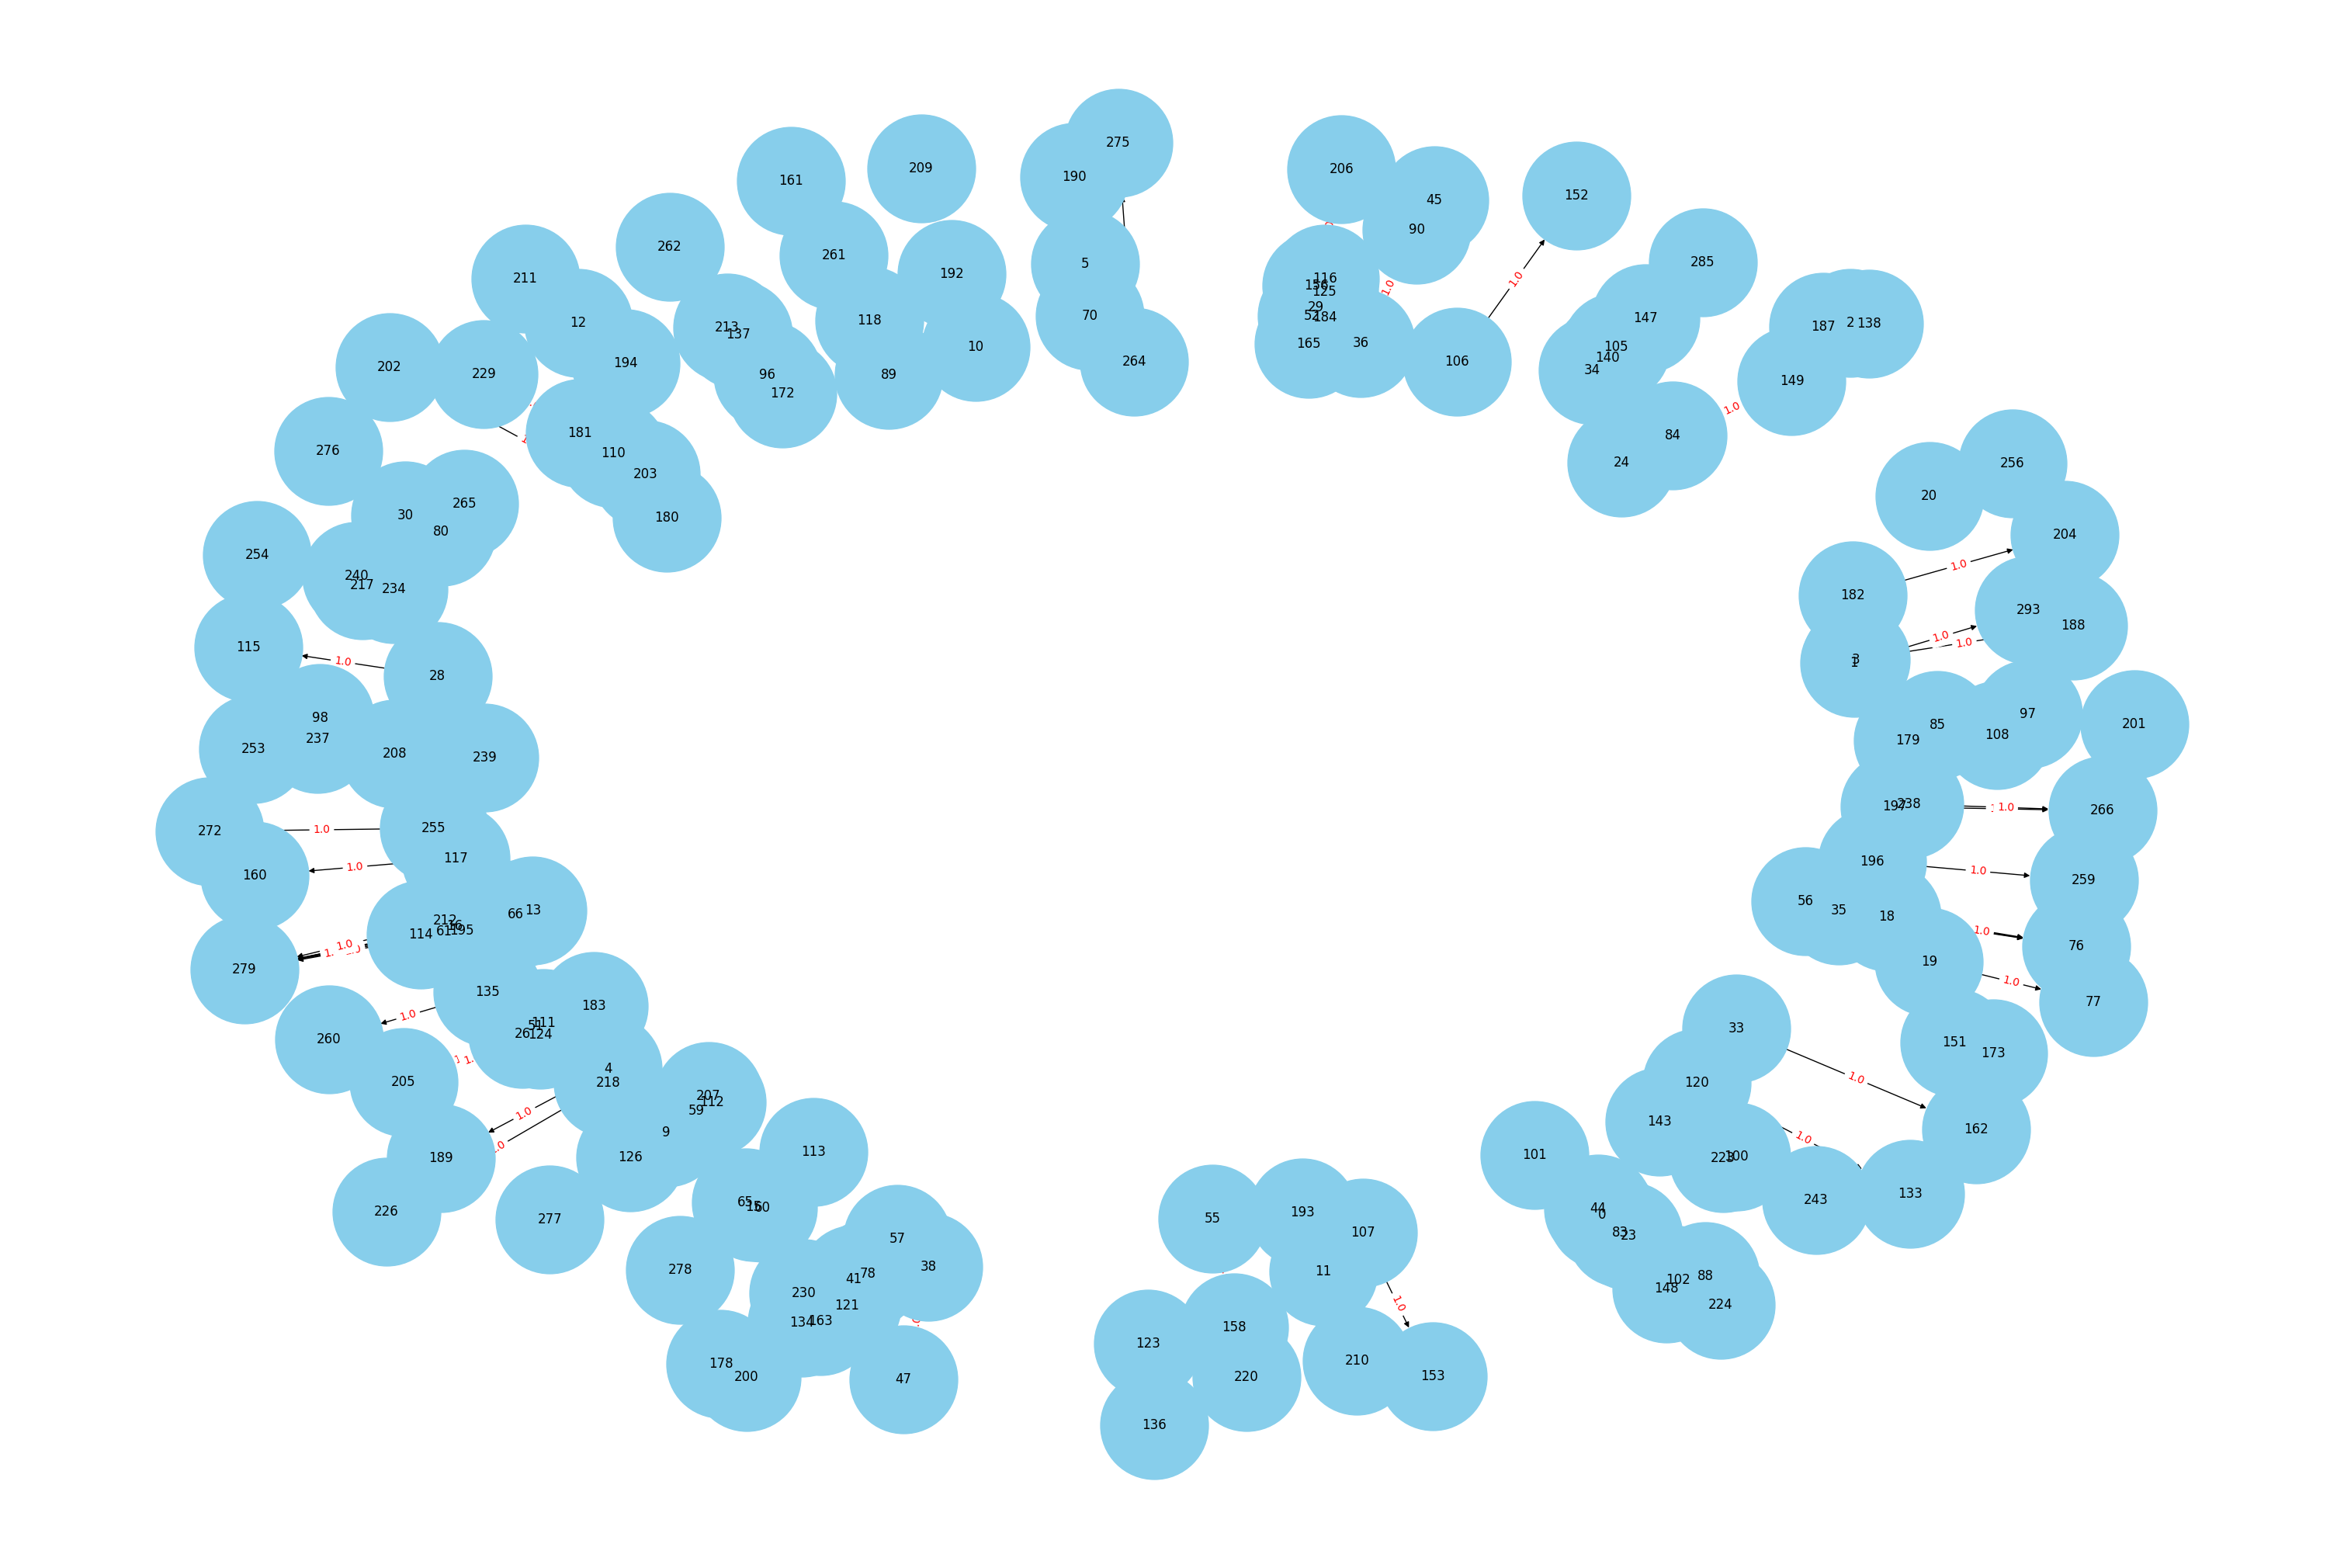



========= document ke-1 ===============
Closenes Centrality Node 0 = 0.0
Closenes Centrality Node 75 = 0.003205128205128205
Closenes Centrality Node 1 = 0.0
Closenes Centrality Node 65 = 0.003205128205128205
Closenes Centrality Node 118 = 0.00641025641025641
Closenes Centrality Node 467 = 0.009615384615384616
Closenes Centrality Node 4 = 0.0
Closenes Centrality Node 68 = 0.003205128205128205
Closenes Centrality Node 87 = 0.00641025641025641
Closenes Centrality Node 121 = 0.009615384615384616
Closenes Centrality Node 166 = 0.01282051282051282
Closenes Centrality Node 234 = 0.016025641025641024
Closenes Centrality Node 270 = 0.019230769230769232
Closenes Centrality Node 349 = 0.022435897435897436
Closenes Centrality Node 397 = 0.02564102564102564
Closenes Centrality Node 404 = 0.028846153846153848
Closenes Centrality Node 423 = 0.03205128205128205
Closenes Centrality Node 435 = 0.035256410256410256
Closenes Centrality Node 5 = 0.0
Closenes Centrality Node 350 = 0.003205128205128205
Clo

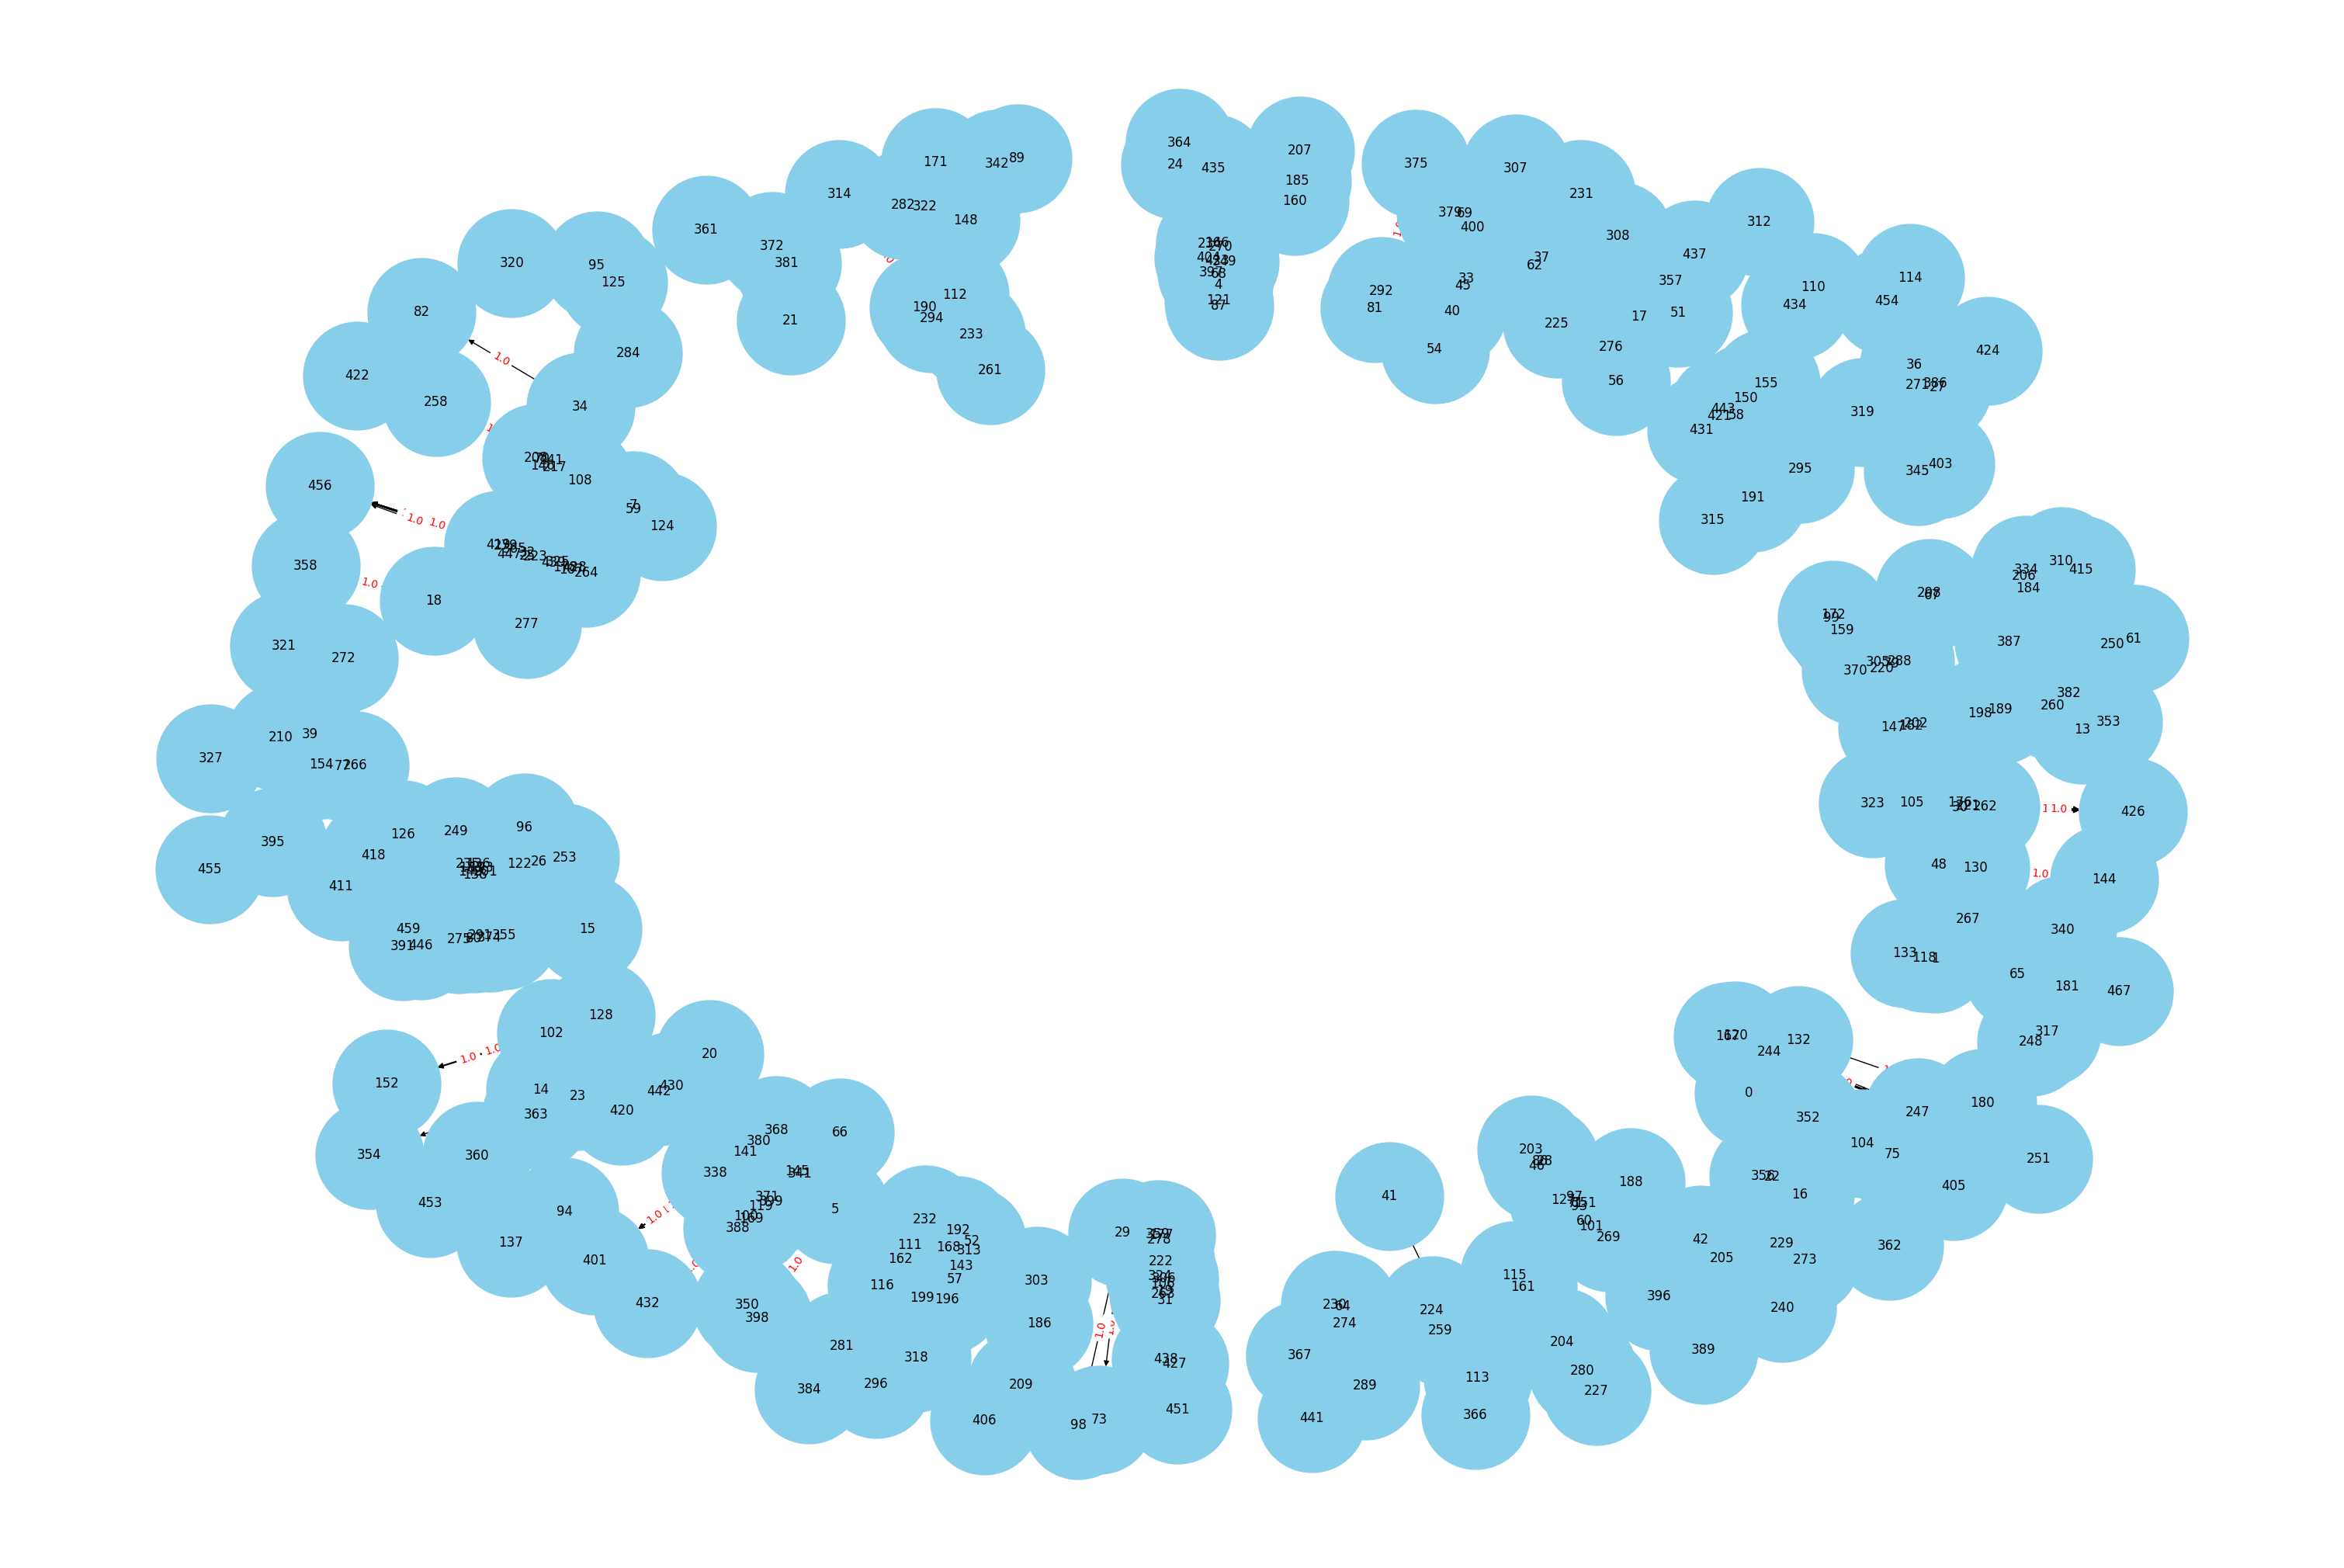



========= document ke-2 ===============
Closenes Centrality Node 0 = 0.0
Closenes Centrality Node 4 = 0.005780346820809248
Closenes Centrality Node 36 = 0.011560693641618497
Closenes Centrality Node 43 = 0.017341040462427744
Closenes Centrality Node 60 = 0.023121387283236993
Closenes Centrality Node 75 = 0.028901734104046242
Closenes Centrality Node 147 = 0.03468208092485549
Closenes Centrality Node 194 = 0.04046242774566474
Closenes Centrality Node 1 = 0.0
Closenes Centrality Node 258 = 0.005780346820809248
Closenes Centrality Node 2 = 0.0
Closenes Centrality Node 108 = 0.005780346820809248
Closenes Centrality Node 130 = 0.011560693641618497
Closenes Centrality Node 5 = 0.0
Closenes Centrality Node 145 = 0.005780346820809248
Closenes Centrality Node 10 = 0.0
Closenes Centrality Node 30 = 0.005780346820809248
Closenes Centrality Node 67 = 0.011560693641618497
Closenes Centrality Node 88 = 0.017341040462427744
Closenes Centrality Node 114 = 0.023121387283236993
Closenes Centrality Nod

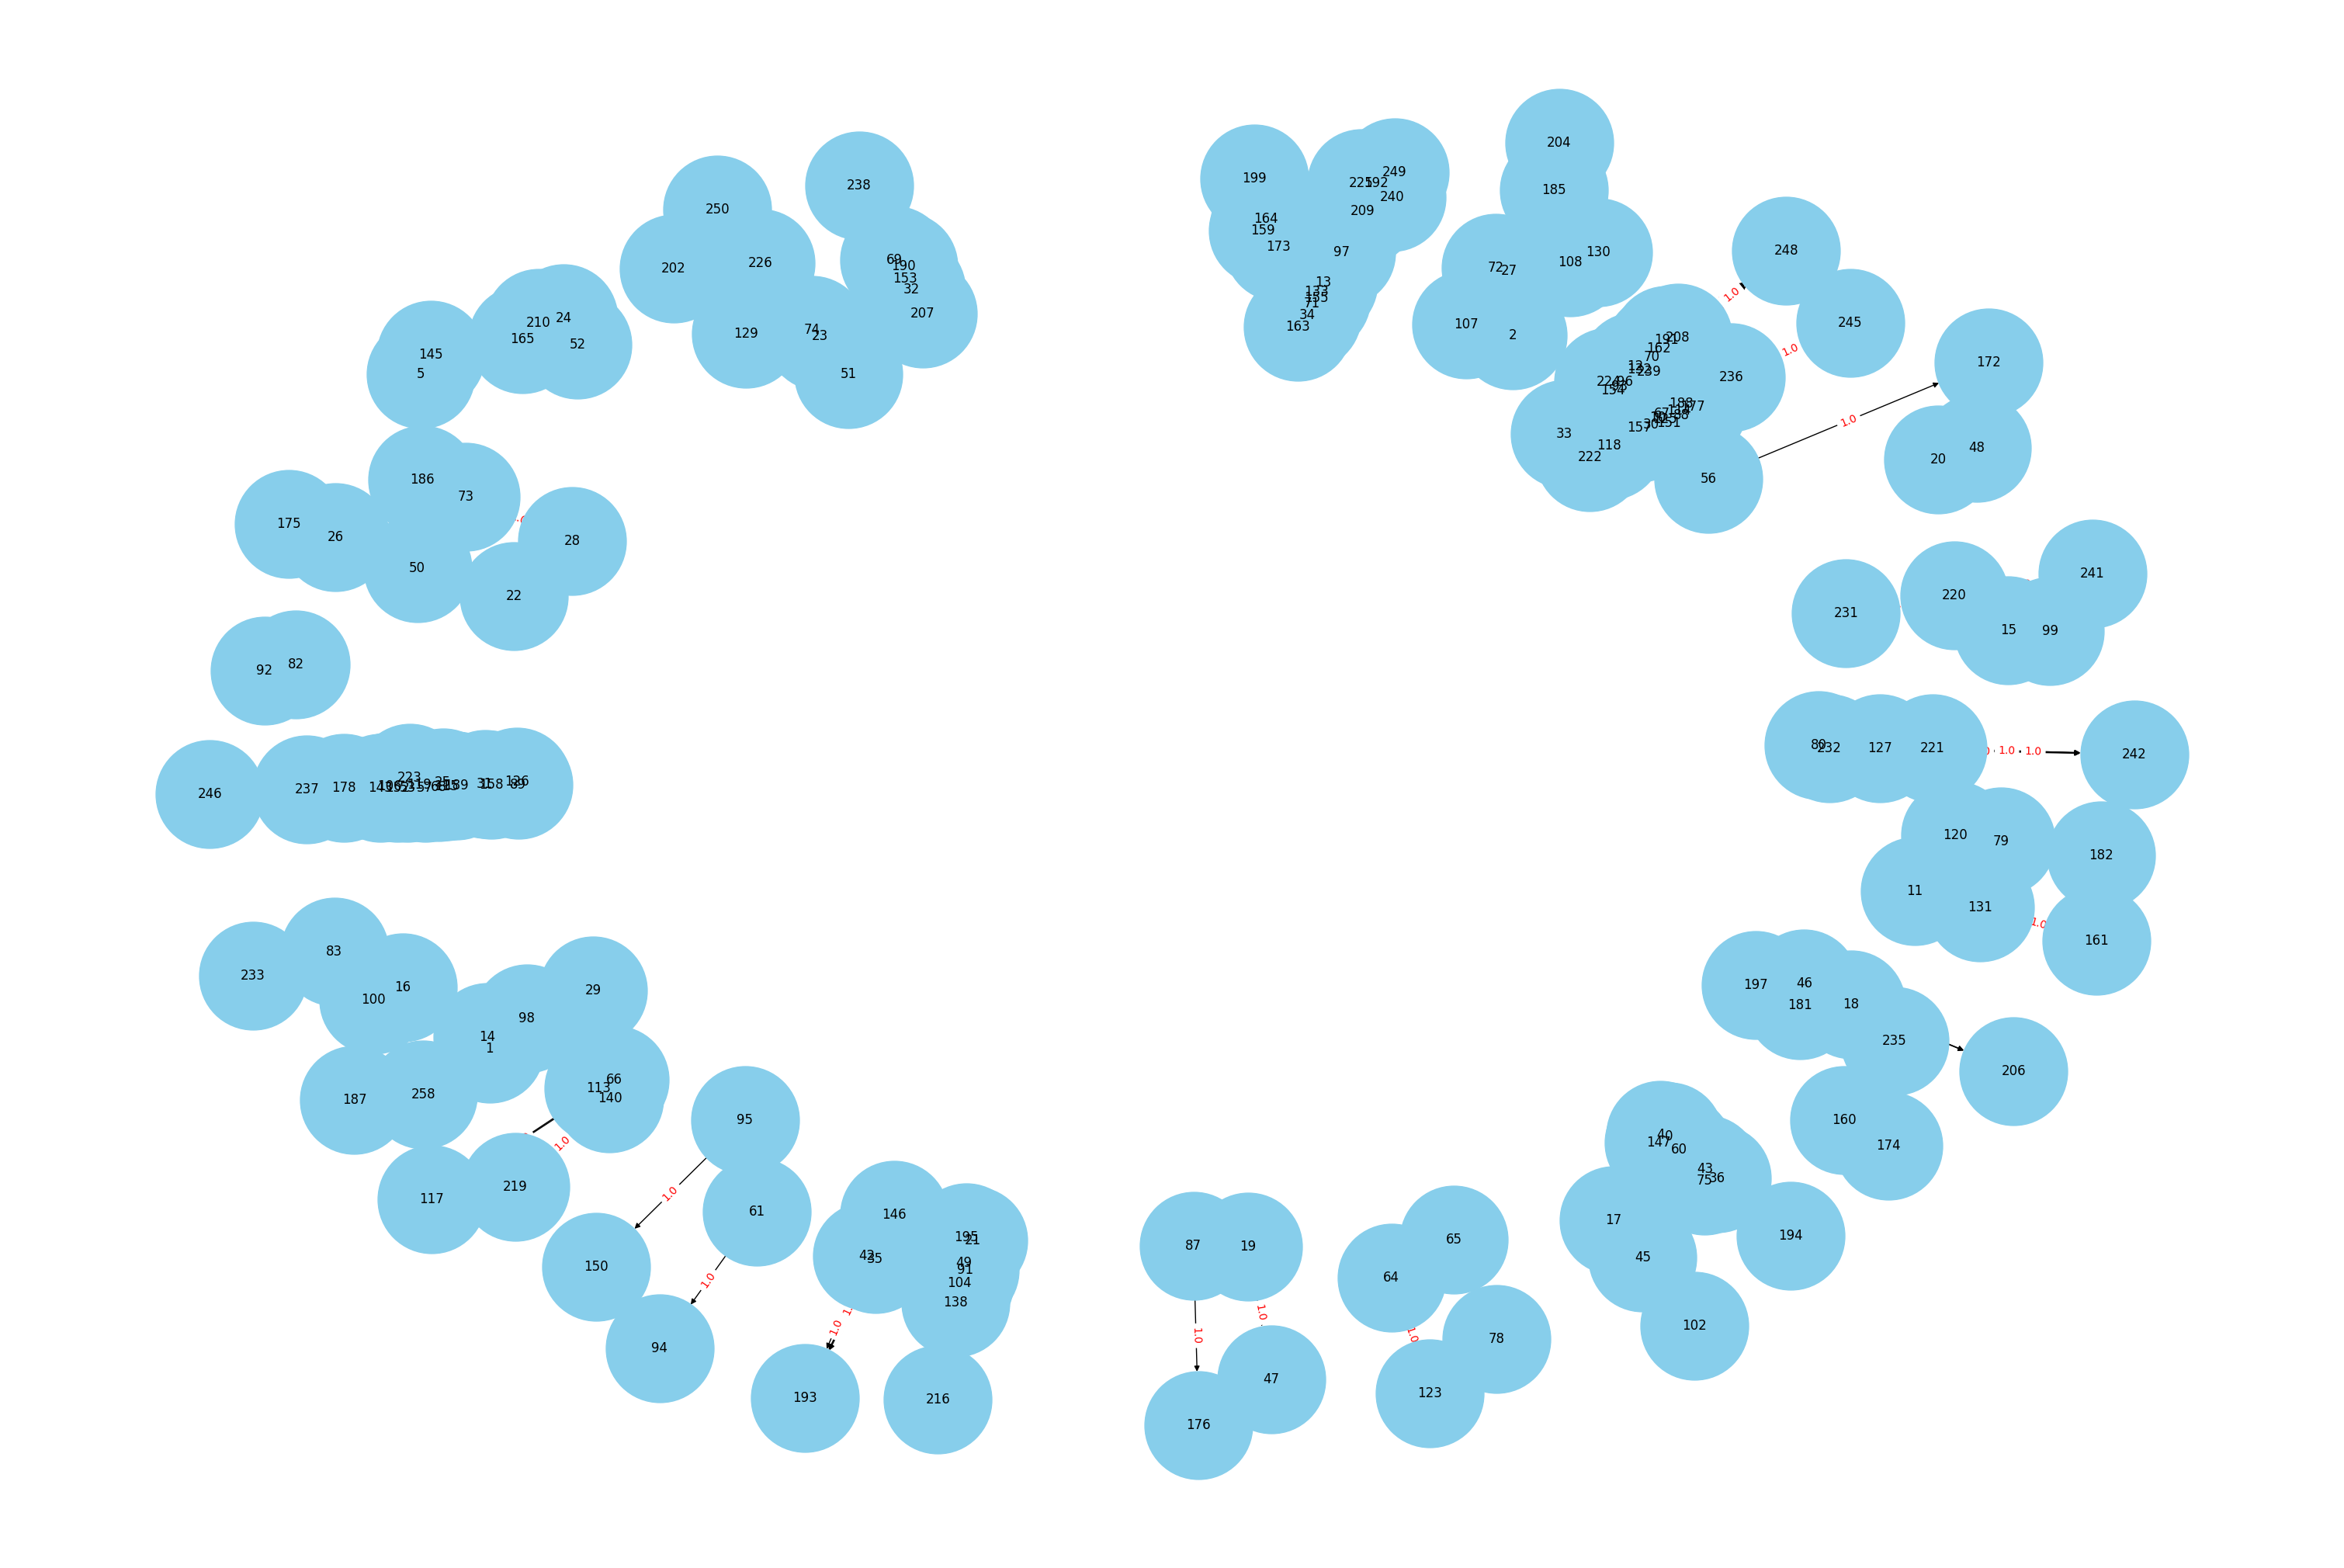



========= document ke-3 ===============
Closenes Centrality Node 0 = 0.0
Closenes Centrality Node 53 = 0.003389830508474576
Closenes Centrality Node 337 = 0.006779661016949152
Closenes Centrality Node 1 = 0.0
Closenes Centrality Node 90 = 0.003389830508474576
Closenes Centrality Node 422 = 0.006779661016949152
Closenes Centrality Node 4 = 0.0
Closenes Centrality Node 11 = 0.003389830508474576
Closenes Centrality Node 67 = 0.006779661016949152
Closenes Centrality Node 85 = 0.010169491525423728
Closenes Centrality Node 101 = 0.013559322033898305
Closenes Centrality Node 126 = 0.01694915254237288
Closenes Centrality Node 206 = 0.020338983050847456
Closenes Centrality Node 272 = 0.023728813559322035
Closenes Centrality Node 306 = 0.02711864406779661
Closenes Centrality Node 313 = 0.030508474576271188
Closenes Centrality Node 368 = 0.03389830508474576
Closenes Centrality Node 375 = 0.03728813559322034
Closenes Centrality Node 396 = 0.04067796610169491
Closenes Centrality Node 5 = 0.0
Clos

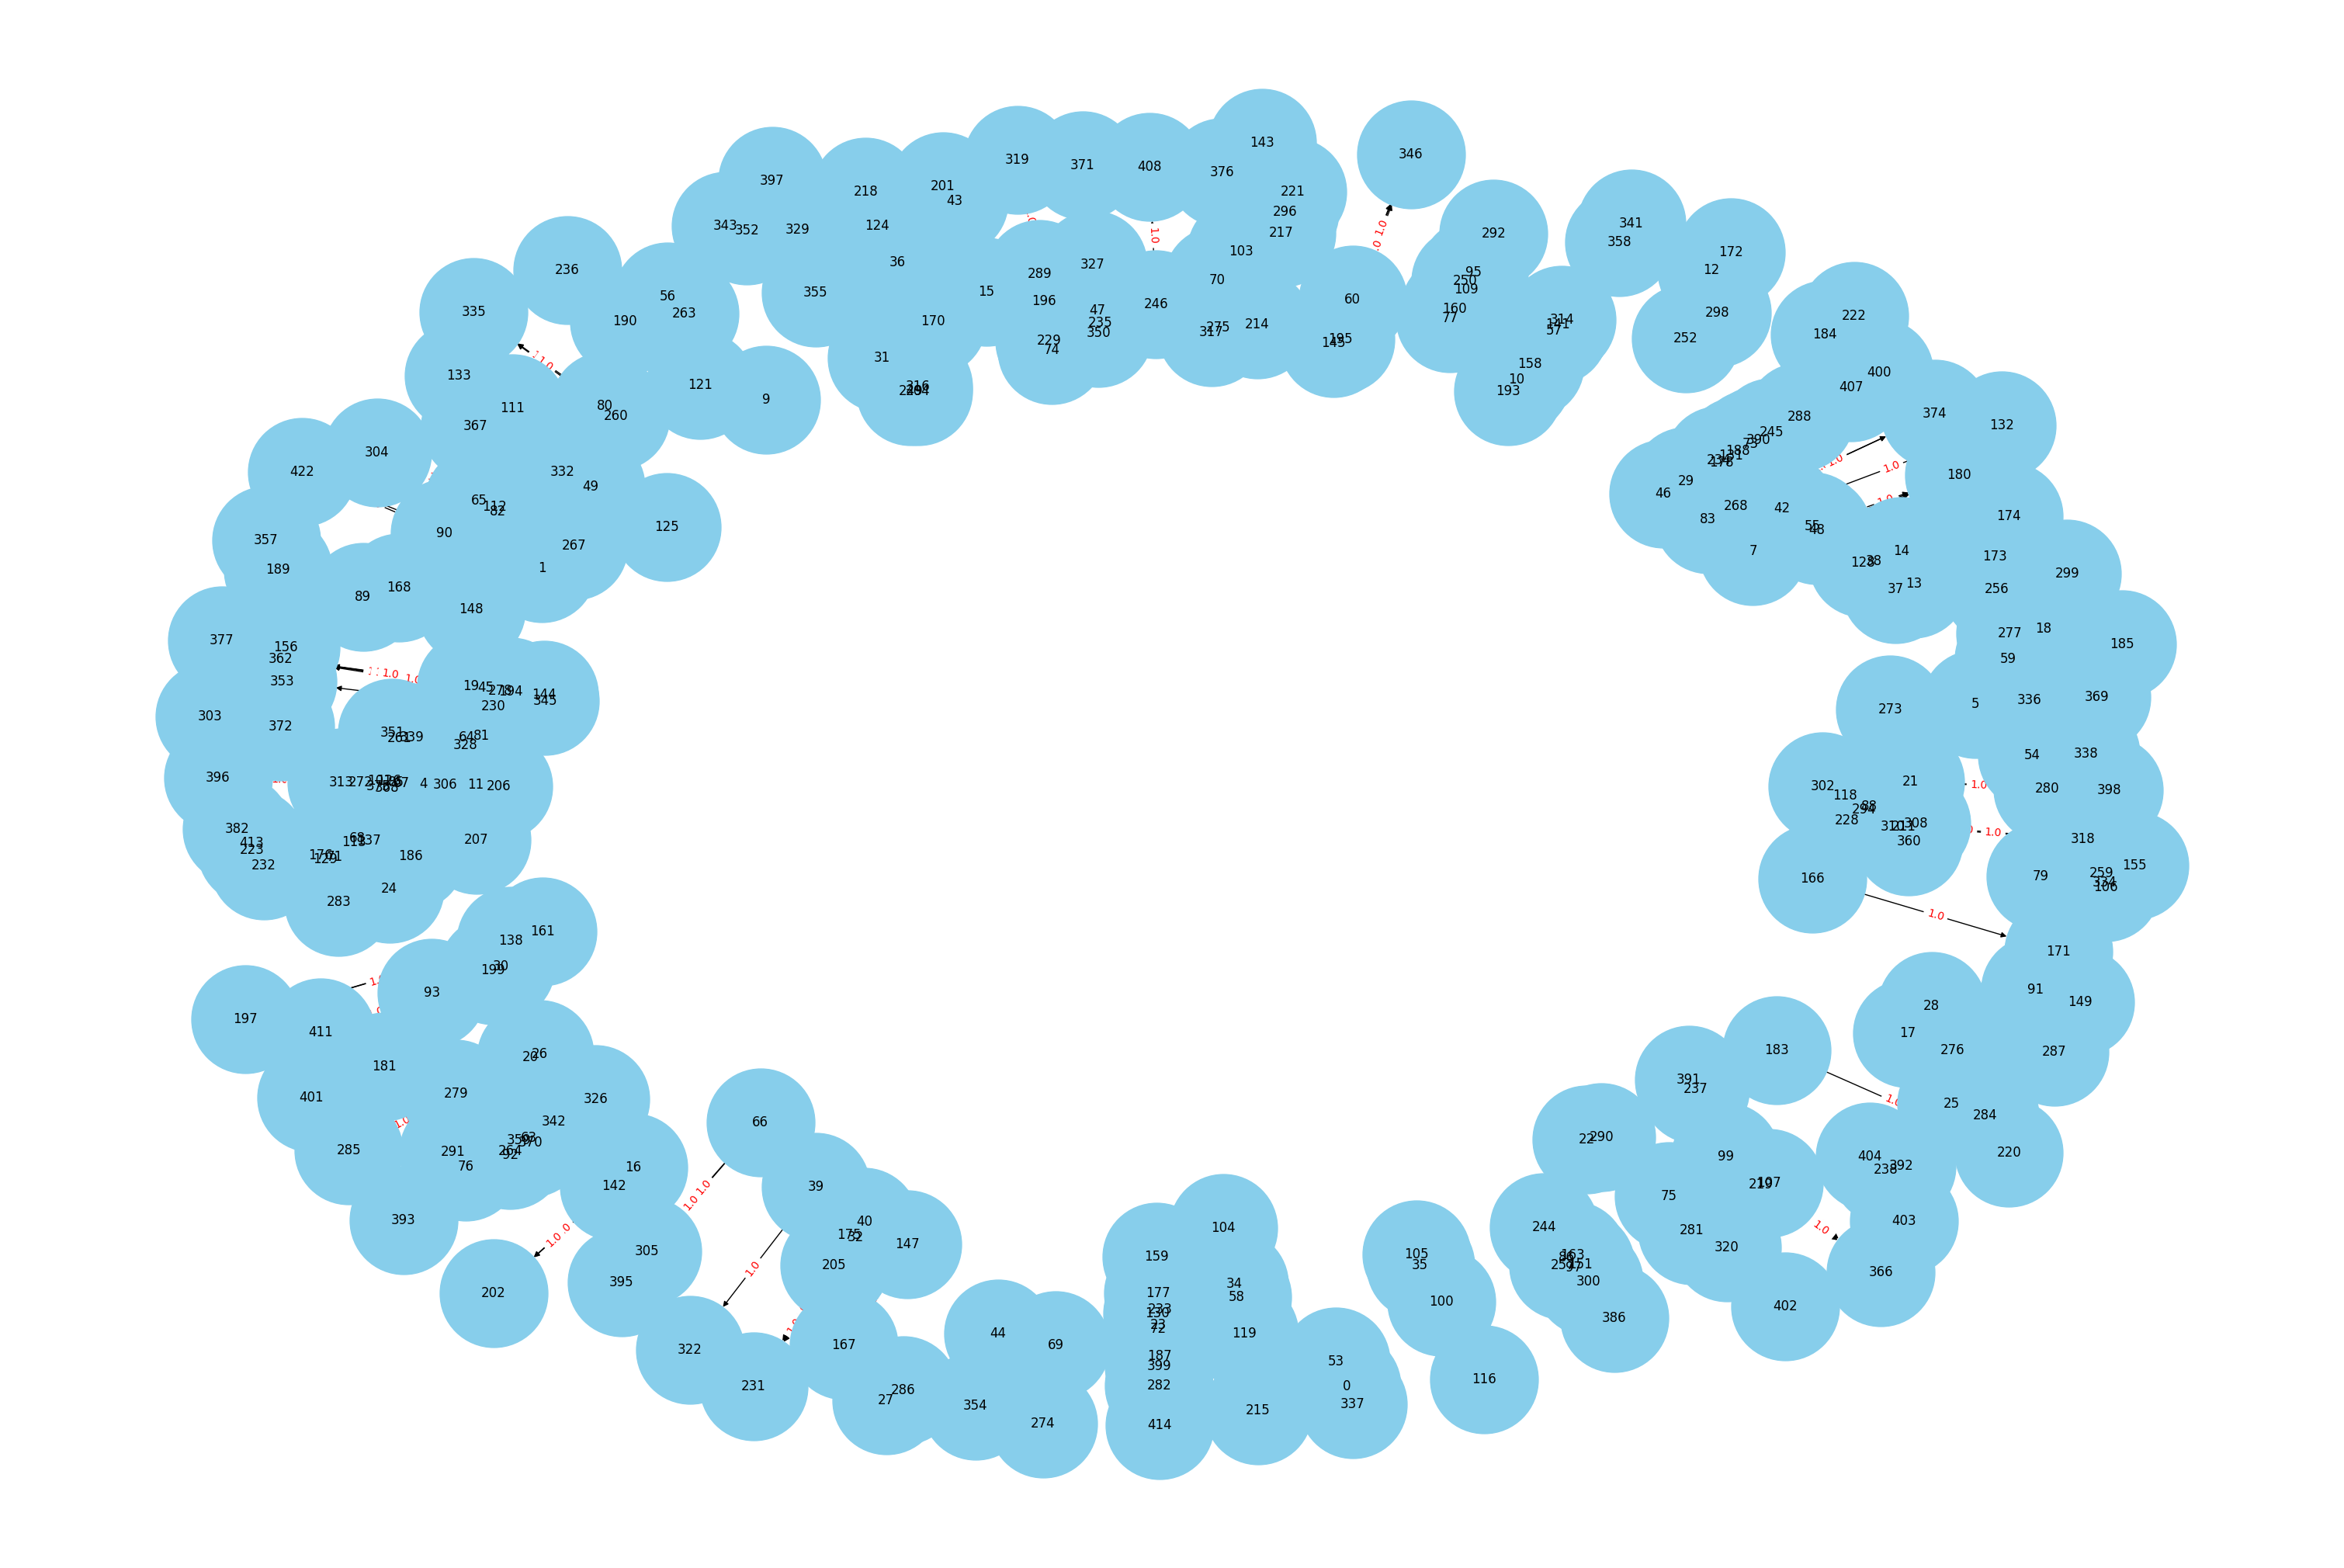

In [ ]:
for i in range(len(graf_result[:4])):
  print(f'========= document ke-{i} ===============')
  clos_cen = nx.closeness_centrality(graf_result[i])
  # print(clos_cen)
  for key, result in clos_cen.items():
    print(f'Closenes Centrality Node {key} = {result}')



  pos = nx.spring_layout(graf_result[i])
  labels = nx.get_edge_attributes(graf_result[i], 'weight')

  plt.figure(figsize=(30, 20))

  nx.draw(graf_result[i], pos, with_labels=True, node_size=10000, node_color='skyblue')
  nx.draw_networkx_edge_labels(graf_result[i], pos, edge_labels=labels, font_color='red')
  plt.show()


  print('\n')

In [ ]:
summary = []
for i in range(len(graf_result)):

  cc = nx.closeness_centrality(graf_result[i])
  cc = dict(sorted(cc.items(), key=lambda item: item[1], reverse=True))

  lists = list(cc.keys())[:3]

  current_summary = []

  for key,value in cc.items():

    current_summary.append(df['Tokenizing'][i][key])
  summary.append(current_summary)

In [ ]:

summary_result = []
for i in range(len(summary)):
  ex_summary = summary[i]

  hasil = "".join(ex_summary) #menggabungkan setiap kalimat yang ada pada dokumen
  summary_result.append(hasil)

In [ ]:
dataSummary = pd.DataFrame(summary_result,columns=['Summary'])
dataSummary = pd.concat([dataSummary,df['Label']],axis=1)
dataSummary

,Summary,Label
0,hiariejtersangkahiariejtersangkajakartawamenku...,hukum
1,mkuumkdpruumkdpruumkyangdpruumkyangpemerintahd...,hukum
2,hukumhukumhukumhukumbantuanhukumbantuanmasyara...,hukum
3,dprdprmkdprmkdpruumkdpruumkdprbahwauumkpemerin...,hukum
4,polripolrisebagaidedirijugapolriirjenpolmarthi...,hukum
...,...,...
589,yangyangyangyangpalestinayangpalestinayangpale...,hiburan
590,smsmsmdansmuntukdansmuntukdanantarasmentertain...,hiburan
591,yangyangyangyangyanggrupampersoneyangboysplane...,hiburan
592,yangyangdiyangsayacooperdiyangsayacooperdiyang...,hiburan


Menyimpan CSV

In [ ]:
import csv

datassummary = []
for i in range(len(summary)):
    ex_summary = summary[i]
    hasil = " ".join(ex_summary)
    datassummary.append({
        'Summary': hasil,
        'Label': df['Label'][i]
    })

# Menyimpan data dalam bentuk CSV
csv_filename = 'Datasummary-antaranews.csv'
fieldnames = ['Summary', 'Label']

with open(csv_filename, 'w', newline='', encoding='utf-8') as csv_file:
    csv_writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
    csv_writer.writeheader()

    for entry in datassummary:
        csv_writer.writerow(entry)

print(f"Data telah disimpan dalam file {csv_filename}")


Data telah disimpan dalam file Datasummary-antaranews.csv


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
#/content/Datasummary-antaranews.csv

In [ ]:
dtsummary = pd.read_csv("/content/Datasummary-antaranews.csv")
dtsummary

,Summary,Label
0,hiariej tersangka hiariej tersangka jakarta wa...,hukum
1,mk uu mk dpr uu mk dpr uu mk yang dpr uu mk ya...,hukum
2,hukum hukum hukum hukum bantuan hukum bantuan ...,hukum
3,dpr dpr mk dpr mk dpr uu mk dpr uu mk dpr bahw...,hukum
4,polri polri sebagai dedi ri juga polri irjen p...,hukum
...,...,...
589,yang yang yang yang palestina yang palestina y...,hiburan
590,sm sm sm dan sm untuk dan sm untuk dan antara ...,hiburan
591,yang yang yang yang yang grup ampersone yang b...,hiburan
592,yang yang di yang saya cooper di yang saya coo...,hiburan


In [ ]:
dtsummary.isna().sum()

Summary    0
Label      0
dtype: int64

In [ ]:
dtsummary.duplicated().sum()

0

In [ ]:
import string


dtsummary['summary_punct'] = dtsummary['Summary'].str.replace('[{}]'.format(string.punctuation), '').str.lower()

dtsummary['summary_punct'] = dtsummary['summary_punct'].str.replace('\d+', '', regex=True)

In [ ]:
dtsummary

,Summary,Label,summary_punct
0,hiariej tersangka hiariej tersangka jakarta wa...,hukum,hiariej tersangka hiariej tersangka jakarta wa...
1,mk uu mk dpr uu mk dpr uu mk yang dpr uu mk ya...,hukum,mk uu mk dpr uu mk dpr uu mk yang dpr uu mk ya...
2,hukum hukum hukum hukum bantuan hukum bantuan ...,hukum,hukum hukum hukum hukum bantuan hukum bantuan ...
3,dpr dpr mk dpr mk dpr uu mk dpr uu mk dpr bahw...,hukum,dpr dpr mk dpr mk dpr uu mk dpr uu mk dpr bahw...
4,polri polri sebagai dedi ri juga polri irjen p...,hukum,polri polri sebagai dedi ri juga polri irjen p...
...,...,...,...
589,yang yang yang yang palestina yang palestina y...,hiburan,yang yang yang yang palestina yang palestina y...
590,sm sm sm dan sm untuk dan sm untuk dan antara ...,hiburan,sm sm sm dan sm untuk dan sm untuk dan antara ...
591,yang yang yang yang yang grup ampersone yang b...,hiburan,yang yang yang yang yang grup ampersone yang b...
592,yang yang di yang saya cooper di yang saya coo...,hiburan,yang yang di yang saya cooper di yang saya coo...


import library

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')

# Download kamus stop words
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Inisialisasi kamus stop words dari NLTK
stop_words = set(stopwords.words('indonesian'))  # Inisialisasi kamus stop words

# Menghapus stop words dari kolom 'Sumary'
for stop_word in stop_words:
  dtsummary['summary_stopwords'] = dtsummary['summary_punct'].str.replace(rf'\b{stop_word}\b', '', regex=True) #rf untuk formating string

In [ ]:
dtsummary

,Summary,Label,summary_punct,summary_stopwords
0,hiariej tersangka hiariej tersangka jakarta wa...,hukum,hiariej tersangka hiariej tersangka jakarta wa...,hiariej tersangka hiariej tersangka jakarta wa...
1,mk uu mk dpr uu mk dpr uu mk yang dpr uu mk ya...,hukum,mk uu mk dpr uu mk dpr uu mk yang dpr uu mk ya...,mk uu mk dpr uu mk dpr uu mk yang dpr uu mk ya...
2,hukum hukum hukum hukum bantuan hukum bantuan ...,hukum,hukum hukum hukum hukum bantuan hukum bantuan ...,hukum hukum hukum hukum bantuan hukum bantuan ...
3,dpr dpr mk dpr mk dpr uu mk dpr uu mk dpr bahw...,hukum,dpr dpr mk dpr mk dpr uu mk dpr uu mk dpr bahw...,dpr dpr mk dpr mk dpr uu mk dpr uu mk dpr bahw...
4,polri polri sebagai dedi ri juga polri irjen p...,hukum,polri polri sebagai dedi ri juga polri irjen p...,polri polri sebagai dedi ri juga polri irjen p...
...,...,...,...,...
589,yang yang yang yang palestina yang palestina y...,hiburan,yang yang yang yang palestina yang palestina y...,yang yang yang yang palestina yang palestina y...
590,sm sm sm dan sm untuk dan sm untuk dan antara ...,hiburan,sm sm sm dan sm untuk dan sm untuk dan antara ...,sm sm sm dan sm untuk dan sm untuk dan antara ...
591,yang yang yang yang yang grup ampersone yang b...,hiburan,yang yang yang yang yang grup ampersone yang b...,yang yang yang yang yang grup ampersone yang b...
592,yang yang di yang saya cooper di yang saya coo...,hiburan,yang yang di yang saya cooper di yang saya coo...,yang yang di yang saya cooper di yang saya coo...


In [ ]:
dtsummary['summary_tokens'] = dtsummary['summary_stopwords'].apply(word_tokenize)
dtsummary

,Summary,Label,summary_punct,summary_stopwords,summary_tokens
0,hiariej tersangka hiariej tersangka jakarta wa...,hukum,hiariej tersangka hiariej tersangka jakarta wa...,hiariej tersangka hiariej tersangka jakarta wa...,"[hiariej, tersangka, hiariej, tersangka, jakar..."
1,mk uu mk dpr uu mk dpr uu mk yang dpr uu mk ya...,hukum,mk uu mk dpr uu mk dpr uu mk yang dpr uu mk ya...,mk uu mk dpr uu mk dpr uu mk yang dpr uu mk ya...,"[mk, uu, mk, dpr, uu, mk, dpr, uu, mk, yang, d..."
2,hukum hukum hukum hukum bantuan hukum bantuan ...,hukum,hukum hukum hukum hukum bantuan hukum bantuan ...,hukum hukum hukum hukum bantuan hukum bantuan ...,"[hukum, hukum, hukum, hukum, bantuan, hukum, b..."
3,dpr dpr mk dpr mk dpr uu mk dpr uu mk dpr bahw...,hukum,dpr dpr mk dpr mk dpr uu mk dpr uu mk dpr bahw...,dpr dpr mk dpr mk dpr uu mk dpr uu mk dpr bahw...,"[dpr, dpr, mk, dpr, mk, dpr, uu, mk, dpr, uu, ..."
4,polri polri sebagai dedi ri juga polri irjen p...,hukum,polri polri sebagai dedi ri juga polri irjen p...,polri polri sebagai dedi ri juga polri irjen p...,"[polri, polri, sebagai, dedi, ri, juga, polri,..."
...,...,...,...,...,...
589,yang yang yang yang palestina yang palestina y...,hiburan,yang yang yang yang palestina yang palestina y...,yang yang yang yang palestina yang palestina y...,"[yang, yang, yang, yang, palestina, yang, pale..."
590,sm sm sm dan sm untuk dan sm untuk dan antara ...,hiburan,sm sm sm dan sm untuk dan sm untuk dan antara ...,sm sm sm dan sm untuk dan sm untuk dan antara ...,"[sm, sm, sm, dan, sm, untuk, dan, sm, untuk, d..."
591,yang yang yang yang yang grup ampersone yang b...,hiburan,yang yang yang yang yang grup ampersone yang b...,yang yang yang yang yang grup ampersone yang b...,"[yang, yang, yang, yang, yang, grup, ampersone..."
592,yang yang di yang saya cooper di yang saya coo...,hiburan,yang yang di yang saya cooper di yang saya coo...,yang yang di yang saya cooper di yang saya coo...,"[yang, yang, di, yang, saya, cooper, di, yang,..."


In [ ]:
# menggabungkan kata
dtsummary['summary_final'] = dtsummary['summary_tokens'].apply(lambda x: ' '.join(x))

In [ ]:
dtsummary

,Summary,Label,summary_punct,summary_stopwords,summary_tokens,summary_final
0,hiariej tersangka hiariej tersangka jakarta wa...,hukum,hiariej tersangka hiariej tersangka jakarta wa...,hiariej tersangka hiariej tersangka jakarta wa...,"[hiariej, tersangka, hiariej, tersangka, jakar...",hiariej tersangka hiariej tersangka jakarta wa...
1,mk uu mk dpr uu mk dpr uu mk yang dpr uu mk ya...,hukum,mk uu mk dpr uu mk dpr uu mk yang dpr uu mk ya...,mk uu mk dpr uu mk dpr uu mk yang dpr uu mk ya...,"[mk, uu, mk, dpr, uu, mk, dpr, uu, mk, yang, d...",mk uu mk dpr uu mk dpr uu mk yang dpr uu mk ya...
2,hukum hukum hukum hukum bantuan hukum bantuan ...,hukum,hukum hukum hukum hukum bantuan hukum bantuan ...,hukum hukum hukum hukum bantuan hukum bantuan ...,"[hukum, hukum, hukum, hukum, bantuan, hukum, b...",hukum hukum hukum hukum bantuan hukum bantuan ...
3,dpr dpr mk dpr mk dpr uu mk dpr uu mk dpr bahw...,hukum,dpr dpr mk dpr mk dpr uu mk dpr uu mk dpr bahw...,dpr dpr mk dpr mk dpr uu mk dpr uu mk dpr bahw...,"[dpr, dpr, mk, dpr, mk, dpr, uu, mk, dpr, uu, ...",dpr dpr mk dpr mk dpr uu mk dpr uu mk dpr bahw...
4,polri polri sebagai dedi ri juga polri irjen p...,hukum,polri polri sebagai dedi ri juga polri irjen p...,polri polri sebagai dedi ri juga polri irjen p...,"[polri, polri, sebagai, dedi, ri, juga, polri,...",polri polri sebagai dedi ri juga polri irjen p...
...,...,...,...,...,...,...
589,yang yang yang yang palestina yang palestina y...,hiburan,yang yang yang yang palestina yang palestina y...,yang yang yang yang palestina yang palestina y...,"[yang, yang, yang, yang, palestina, yang, pale...",yang yang yang yang palestina yang palestina y...
590,sm sm sm dan sm untuk dan sm untuk dan antara ...,hiburan,sm sm sm dan sm untuk dan sm untuk dan antara ...,sm sm sm dan sm untuk dan sm untuk dan antara ...,"[sm, sm, sm, dan, sm, untuk, dan, sm, untuk, d...",sm sm sm dan sm untuk dan sm untuk dan antara ...
591,yang yang yang yang yang grup ampersone yang b...,hiburan,yang yang yang yang yang grup ampersone yang b...,yang yang yang yang yang grup ampersone yang b...,"[yang, yang, yang, yang, yang, grup, ampersone...",yang yang yang yang yang grup ampersone yang b...
592,yang yang di yang saya cooper di yang saya coo...,hiburan,yang yang di yang saya cooper di yang saya coo...,yang yang di yang saya cooper di yang saya coo...,"[yang, yang, di, yang, saya, cooper, di, yang,...",yang yang di yang saya cooper di yang saya coo...


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
summ_tfidf_vectorizer = TfidfVectorizer()

summ_tfidf_matrix = summ_tfidf_vectorizer.fit_transform(dtsummary['summary_final'])

summ_tfidf_df = pd.DataFrame(summ_tfidf_matrix.toarray(),columns=summ_tfidf_vectorizer.get_feature_names_out())
summ_tfidf_df = pd.concat([dtsummary['Summary'],summ_tfidf_df,dtsummary['Label']],axis=1)

summ_tfidf_df

,Summary,aaba,aap,ab,abaca,abad,abadi,abaka,abaya,abdulrachman,...,zira,zombie,zona,zootopia,zubairi,zubarah,zubir,zulfikar,zuu,Label
0,hiariej tersangka hiariej tersangka jakarta wa...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,hukum
1,mk uu mk dpr uu mk dpr uu mk yang dpr uu mk ya...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,hukum
2,hukum hukum hukum hukum bantuan hukum bantuan ...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,hukum
3,dpr dpr mk dpr mk dpr uu mk dpr uu mk dpr bahw...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,hukum
4,polri polri sebagai dedi ri juga polri irjen p...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,hukum
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,yang yang yang yang palestina yang palestina y...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,hiburan
590,sm sm sm dan sm untuk dan sm untuk dan antara ...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,hiburan
591,yang yang yang yang yang grup ampersone yang b...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,hiburan
592,yang yang di yang saya cooper di yang saya coo...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,hiburan


In [ ]:
summ_tfidf_df.isnull().sum()

Summary     0
aaba        0
aap         0
ab          0
abaca       0
           ..
zubarah     0
zubir       0
zulfikar    0
zuu         0
Label       0
Length: 7232, dtype: int64

In [ ]:
summ_tfidf_df = summ_tfidf_df.dropna()

In [ ]:
# import library
from sklearn.model_selection import train_test_split

In [ ]:
X_tfidf = summ_tfidf_df.iloc[:,1:-1]
y_tfidf = summ_tfidf_df["Label"]
X_tfidf_train, X_tfidf_test, y_tfidf_train, y_tfidf_test = train_test_split(X_tfidf, y_tfidf, test_size=0.2, random_state=42)

In [ ]:
from sklearn.metrics import make_scorer, accuracy_score,precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score


In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Inisialisasi model Naive Bayes
rf = RandomForestClassifier()

rf.fit(X_tfidf_train, y_tfidf_train)

y_pred = rf.predict(X_tfidf_test)

accuracy_rf = accuracy_score(y_tfidf_test, y_pred)
print(f'Akurasi model Random Forest: {accuracy_rf}')


Akurasi model Random Forest: 0.8739495798319328
